In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
motor_data = pd.read_csv('unitree/data/go1_with_all.csv', index_col=0)
# tor_ff = pd.read_csv('./unitree/data/forward.csv')

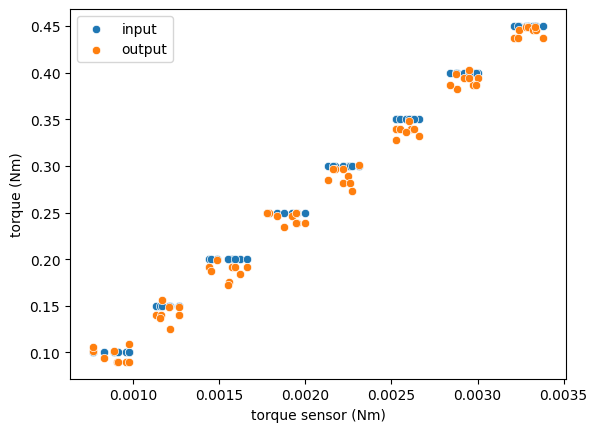

In [53]:
motor_data['torque_sensor'] = motor_data['voltage'].apply(lambda x: x  / 0.4509 * 22.6)
sns.scatterplot(data=motor_data, x='torque_sensor', y='input_torque')
sns.scatterplot(data=motor_data, x='torque_sensor', y='output_torque')
plt.ylabel('torque (Nm)')
plt.xlabel('torque sensor (Nm)')
plt.legend(['input', 'output'])
plt.show()

,input_speed,input_torque,voltage,output_speed,output_torque,temp,torque_sensor
0,12.66,0.10,0.000015,16.95970,0.101562,28.0,0.000764
1,12.66,0.10,0.000017,11.33920,0.093750,28.0,0.000828
2,12.66,0.10,0.000015,11.41280,0.105469,28.0,0.000762
3,12.66,0.15,0.000023,9.57206,0.140625,28.0,0.001129
4,12.66,0.15,0.000023,11.95280,0.140625,28.0,0.001163
...,...,...,...,...,...,...,...
67,25.32,0.40,0.000060,25.23100,0.386719,30.0,0.002993
68,25.32,0.40,0.000059,23.78290,0.394531,30.0,0.002951
69,25.32,0.45,0.000067,20.71490,0.445312,30.0,0.003342
70,25.32,0.45,0.000068,22.82570,0.437500,30.0,0.003384


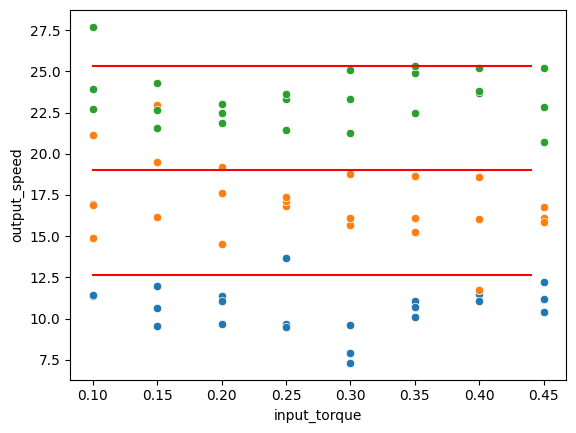

In [54]:
def plot_group(df):
    sns.scatterplot(data=df, x='input_torque', y='output_speed')
    x = np.arange(df['input_torque'].min(), df['input_torque'].max(), 0.01)
    y = df['input_speed'].iloc[0] * np.ones(len(x))
    sns.lineplot(x=x, y=y, color='red')
    return df

motor_data['output_speed'] = abs(motor_data['output_speed'])
motor_data.groupby('input_speed', as_index=False).apply(lambda x: plot_group(x))

,input_speed,input_torque,voltage,output_speed,output_torque,temp
0,12.66,0.10,0.000135,13.5972,0.105469,33.0
1,12.66,0.10,0.000140,14.5054,0.093750,33.0
2,12.66,0.10,0.000140,14.7508,0.085938,33.0
3,12.66,0.15,0.000192,13.5482,0.132812,33.0
4,12.66,0.15,0.000189,13.9409,0.140625,33.0
...,...,...,...,...,...,...
67,25.32,0.40,0.000476,24.5683,0.402344,33.0
68,25.32,0.40,0.000477,21.8439,0.386719,33.0
69,25.32,0.45,0.000542,24.9610,0.445312,33.0
70,25.32,0.45,0.000542,21.5740,0.460938,33.0


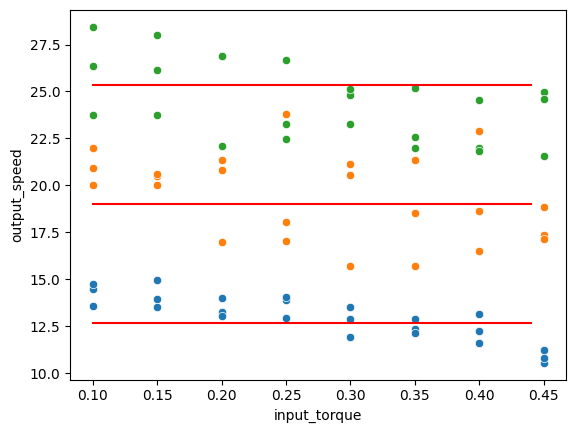

In [48]:
def plot_group(df):
    sns.scatterplot(data=df, x='input_torque', y='output_speed')
    x = np.arange(df['input_torque'].min(), df['input_torque'].max(), 0.01)
    y = df['input_speed'].iloc[0] * np.ones(len(x))
    sns.lineplot(x=x, y=y, color='red')
    return df

motor_data['output_speed'] = abs(motor_data['output_speed'])
motor_data.groupby('input_speed', as_index=False).apply(lambda x: plot_group(x))

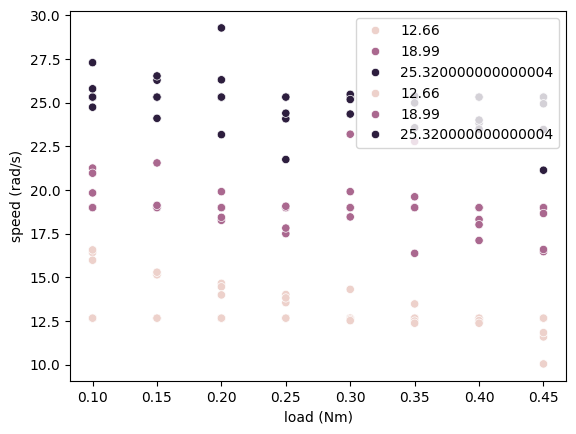

In [33]:
motor_data['output_speed'] = abs(motor_data['output_speed'])
sns.scatterplot(data=motor_data, x="input_torque", y='input_speed', hue='input_speed')
sns.scatterplot(data=motor_data, x="input_torque", y='output_speed', hue='input_speed')
plt.legend()
plt.ylabel('speed (rad/s)')
plt.xlabel('load (Nm)')
plt.show()

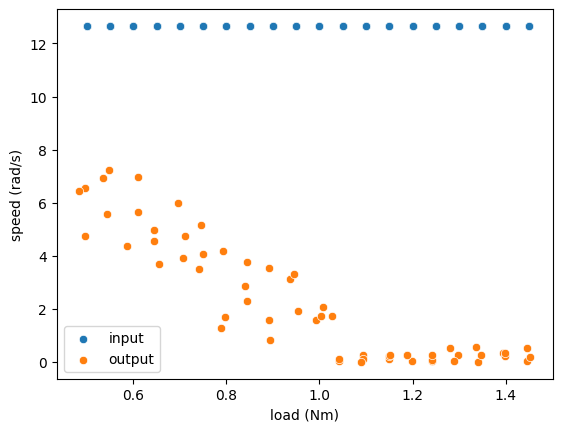

In [26]:
# motor_data['output_speed'] = abs(motor_data['output_speed'])
# sns.scatterplot(data=motor_data, x="input_torque", y='input_speed')
# sns.scatterplot(data=motor_data, x="output_torque", y='output_speed')
# plt.legend(labels=['input', 'output'])
# plt.ylabel('speed (rad/s)')
# plt.xlabel('load (Nm)')
# plt.show()

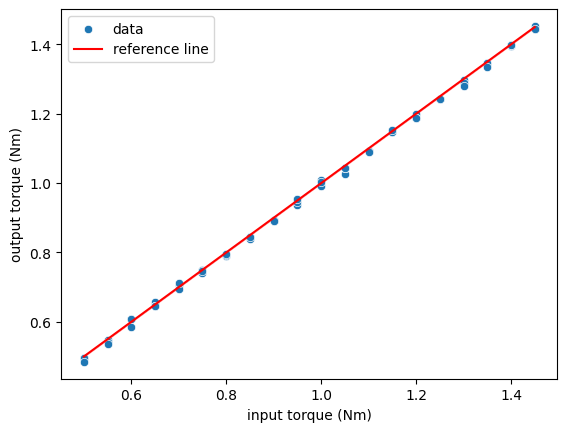

In [113]:
sns.scatterplot(data=motor_data, x="input_torque", y='output_torque')
sns.lineplot(data=motor_data, x='input_torque', y='input_torque', color='red')
plt.legend(['data', 'reference line'])
plt.ylabel('output torque (Nm)')
plt.xlabel('input torque (Nm)')
plt.show()

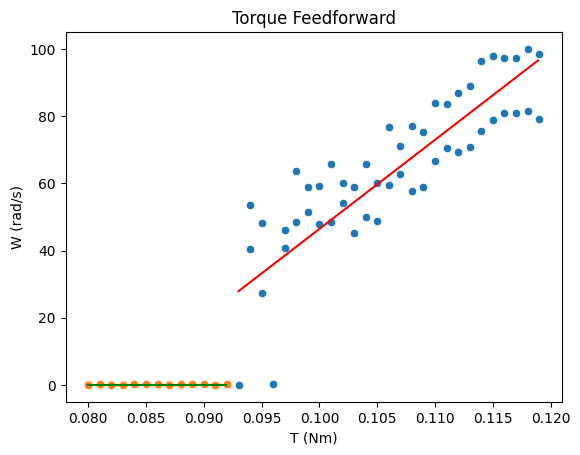

In [14]:
Threshold = 0.092

under_fit = tor_ff[tor_ff['T'] > Threshold]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(under_fit['T'].values.reshape(-1, 1), under_fit['W'].values.reshape(-1, 1))
x = np.arange(under_fit['T'].min(), under_fit['T'].max(), 0.0001)
static_x = np.arange(tor_ff['T'].min(), Threshold, 0.0001)
# Get the coefficients of the fitted line
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Generate the fitted line
fitting_line = slope * x + intercept
sns.lineplot(x=x, y=fitting_line.reshape(-1), color='red')
sns.lineplot(x=static_x, y=0, color='green')
sns.scatterplot(data=under_fit, x="T", y="W")
sns.scatterplot(data=tor_ff[tor_ff['T'] <= Threshold], x="T", y="W")
plt.title('Torque Feedforward')
plt.ylabel('W (rad/s)')
plt.xlabel('T (Nm)')
plt.show()